# Anime Recommendation System

<img src="https://wallpapers.com/images/high/anime-characters-1920-x-1080-picture-pbv9adov2zpjb4x0.webp" style="width: 100%; height: 100%; float: left;">


In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import string  

## Importing Dataset

In [309]:
anime_data=pd.read_csv('anime.csv')
rating_data=pd.read_csv('rating.csv')


### About Dataset

### Content:

**Anime.csv that contains ratings of movies by users:**
* **anime_id** - myanimelist.net's unique id identifying an anime.
* **name** - full name of anime.
* **genre** - comma separated list of genres for this anime.
* **type** - movie, TV, OVA, etc.
* **episodes** - how many episodes in this show. (1 if movie).
* **rating** - average rating out of 10 for this anime.
* **members** - number of community members that are in this anime's
"group".

**Rating.csv that contains movie information:**
* **user_id** - non identifiable randomly generated user id.
* **anime_id** - the anime that this user has rated.
* **rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).



In [310]:
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## EDA

In [311]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [312]:
rating_data.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [313]:
rating_data.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

### Data Cleaning

In [314]:
rating_data["rating"] = rating_data["rating"].replace(-1, pd.NA)

In [315]:
rating_data = rating_data.dropna(subset=["rating"])

In [316]:
rating_data.describe()

,user_id,anime_id
count,6.337241e+06,6.337241e+06
mean,3.674791e+04,8.902866e+03
std,2.101340e+04,8.882000e+03
min,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03
50%,3.681500e+04,6.213000e+03
75%,5.487300e+04,1.407500e+04
max,7.351600e+04,3.447500e+04


In [317]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    text = re.sub(r'Â°', '',text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [318]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [319]:
rating_data.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [320]:
anime_data.episodes.replace({'Unknown':np.nan},inplace=True)

In [321]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
describe    0
dtype: int64

In [322]:
anime.dropna(inplace=True)

In [323]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
describe    0
dtype: int64

## Merging the Datasets

We are merging our csv's based on anime_id from both datasets and later we are renaming the columns


In [324]:
merged_data = pd.merge(anime_data, rating_data, on='anime_id')
# merged_data.head()
merged_data.drop("anime_id", axis=1)

,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...
6337234,Toushindai My Lover Minami tai MechaMinami,Hentai,OVA,1,4.15,211,58483,1
6337235,Under World,Hentai,OVA,1,4.28,183,49503,4
6337236,Under World,Hentai,OVA,1,4.28,183,58483,1
6337237,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6


In [325]:
merged_data = merged_data.rename(columns={'name':'anime_title', 'rating_x':'avg_rating','rating_y':'user_rating'})
merged_data.head()


,anime_id,anime_title,genre,type,episodes,avg_rating,members,user_id,user_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [326]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337239 entries, 0 to 6337238
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   anime_title  object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   avg_rating   float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 483.5+ MB


In [327]:
anime_data.shape

(12294, 7)

In [328]:
rating_data.shape

(6337241, 3)

In [329]:
merged_data.shape

(6337239, 9)

In [330]:
merged_data.dtypes

anime_id         int64
anime_title     object
genre           object
type            object
episodes        object
avg_rating     float64
members          int64
user_id          int64
user_rating     object
dtype: object

In [331]:
merged_data['episodes'] = pd.to_numeric(merged_data['episodes'], errors='coerce')
merged_data['episodes'] = merged_data['episodes'].astype('Int64')


In [332]:
merged_data = merged_data.dropna(subset=["episodes"])

### Handling Missing values

In [333]:
print("Missing values : ")
merged_data.isnull().sum()

Missing values : 


anime_id        0
anime_title     0
genre          88
type            0
episodes        0
avg_rating      1
members         0
user_id         0
user_rating     0
dtype: int64

In [334]:
print("Percentage of missing data")
merged_data.isnull().sum() / len(merged_data)*100

Percentage of missing data


anime_id       0.000000
anime_title    0.000000
genre          0.001389
type           0.000000
episodes       0.000000
avg_rating     0.000016
members        0.000000
user_id        0.000000
user_rating    0.000000
dtype: float64

In [335]:
merged_data.dropna(inplace=True)

In [336]:
merged_data.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
avg_rating     0
members        0
user_id        0
user_rating    0
dtype: int64

### Removing Duplicated rows

In [337]:
duplicate = merged_data.duplicated(subset=['anime_id','user_id']).sum()
print('{} duplicated rows'.format(duplicate))

7 duplicated rows


In [338]:
merged_data.drop_duplicates(subset=['anime_id','user_id'], inplace=True)

In [339]:
print("Duplicated rows : {}".format(merged_data.duplicated().sum()))

Duplicated rows : 0


### Final Dataset

In [340]:
merged_data.shape

(6337137, 9)

In [341]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337137 entries, 0 to 6337238
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   anime_title  object 
 2   genre        object 
 3   type         object 
 4   episodes     Int64  
 5   avg_rating   float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  object 
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 489.5+ MB


## Analysis

(-0.5, 799.5, 399.5, -0.5)

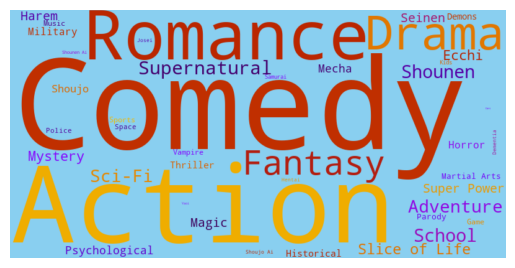

In [342]:
# reference : https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering

nonull_anime=merged_data.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='#89CFF0', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

In [343]:
d1=pd.DataFrame(list(dict(all_genres).keys()),columns=['Genre'])
d2=pd.DataFrame(list(dict(all_genres).values()),columns=['count'])

In [344]:
all_genres1=pd.concat(objs=(d1,d2),axis=1)
all_genres1.head()

,Genre,count
0,Drama,1727681
1,Romance,2031672
2,School,1540797
3,Supernatural,1612455
4,Action,2663837


C:\Users\manur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='Genre'>

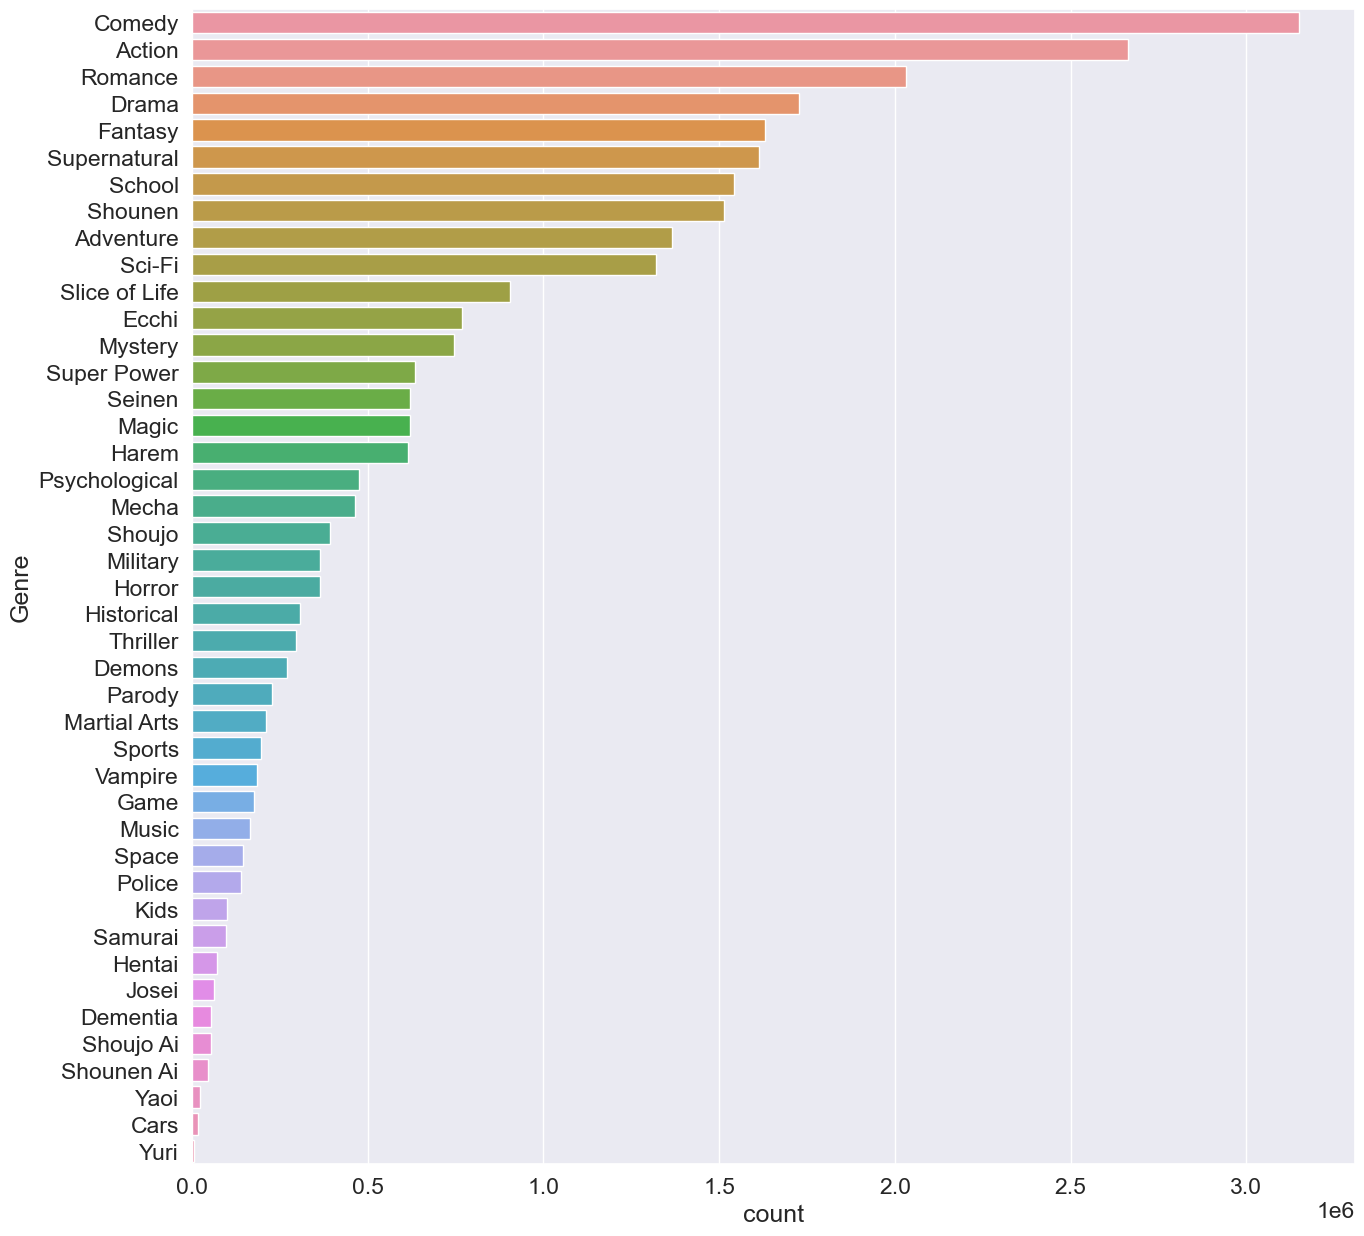

In [345]:
all_genres1=all_genres1.sort_values(by='count',ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(all_genres1['count'],all_genres1['Genre'])

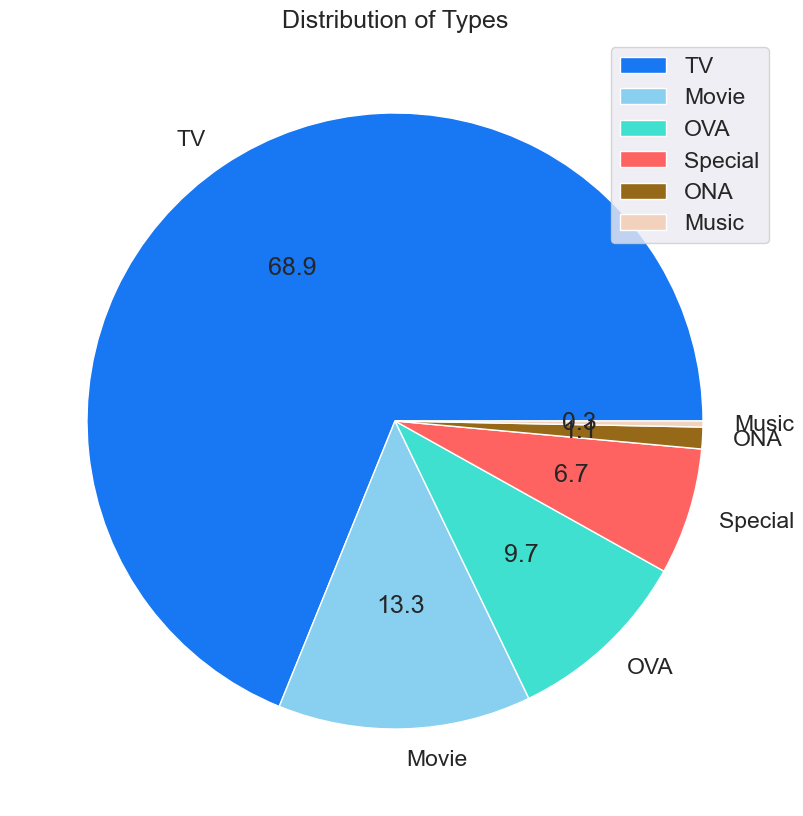

In [346]:
labels = merged_data['type'].value_counts().index
values = merged_data['type'].value_counts().values
plt.figure(figsize=(15,10))
plt.pie(x=values,labels=labels,autopct='%.1f',colors=['#1877F2','#89CFF0','#40E0D0','#FF6361','#966919','#F2D2BD'])
plt.legend()
plt.title('Distribution of Types')
plt.show()

Text(0, 0.5, 'User Rating count')

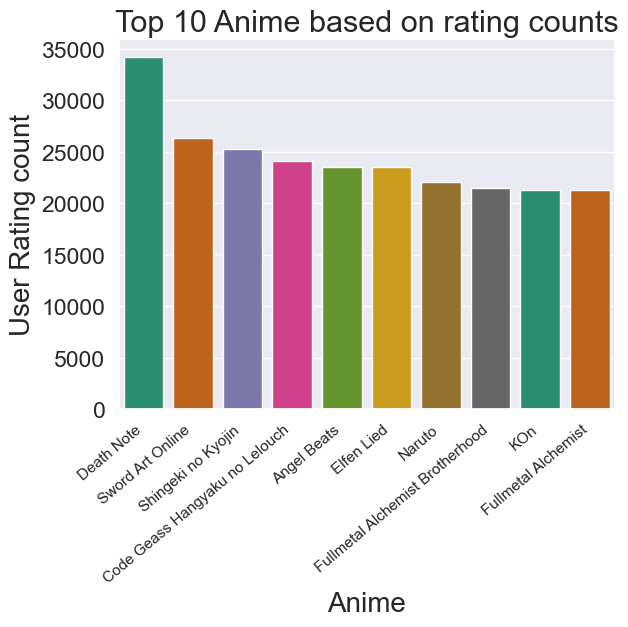

In [347]:
# Creating a dataframe for rating counts
combine_anime_rating = merged_data.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)


In [348]:
## Which anime has the highest ratings

high_rated_anime = merged_data[['anime_title', 'user_rating', 'members', 'type']].sort_values(by='user_rating', ascending=False).query('members>500000').drop_duplicates(subset=['anime_title'])[:5]
high_rated_anime

,anime_title,user_rating,members,type
881282,Angel Beats,10,717796,TV
929949,Durarara,10,556431,TV
2266888,Ao no Exorcist,10,583823,TV
1054964,Fullmetal Alchemist,10,600384,TV
2143025,Bleach,10,624055,TV


In [349]:
## Highest rated anime movies

High_rated_movies = merged_data[merged_data['type'] == 'Movie'][['anime_title', 'user_rating', 'members', 'type']].sort_values(by='user_rating', ascending=False).query('members>200000').drop_duplicates(subset=['anime_title'])[:5]
High_rated_movies

,anime_title,user_rating,members,type
642126,Tonari no Totoro,10,271484,Movie
1173612,Summer Wars,10,223359,Movie
1720563,Byousoku 5 Centimeter,10,324035,Movie
1010253,Ghost in the Shell,10,223036,Movie
728149,Neon Genesis Evangelion The End of Evangelion,10,215630,Movie


### Correlation

In [350]:
corr_matrix=merged_data.corr()
corr_matrix

,anime_id,episodes,avg_rating,members,user_id
anime_id,1.000000,-0.157043,-0.025331,0.003212,-0.031083
episodes,-0.157043,1.000000,0.159810,0.256167,-0.001170
avg_rating,-0.025331,0.159810,1.000000,0.541075,-0.007909
members,0.003212,0.256167,0.541075,1.000000,-0.015407
user_id,-0.031083,-0.001170,-0.007909,-0.015407,1.000000


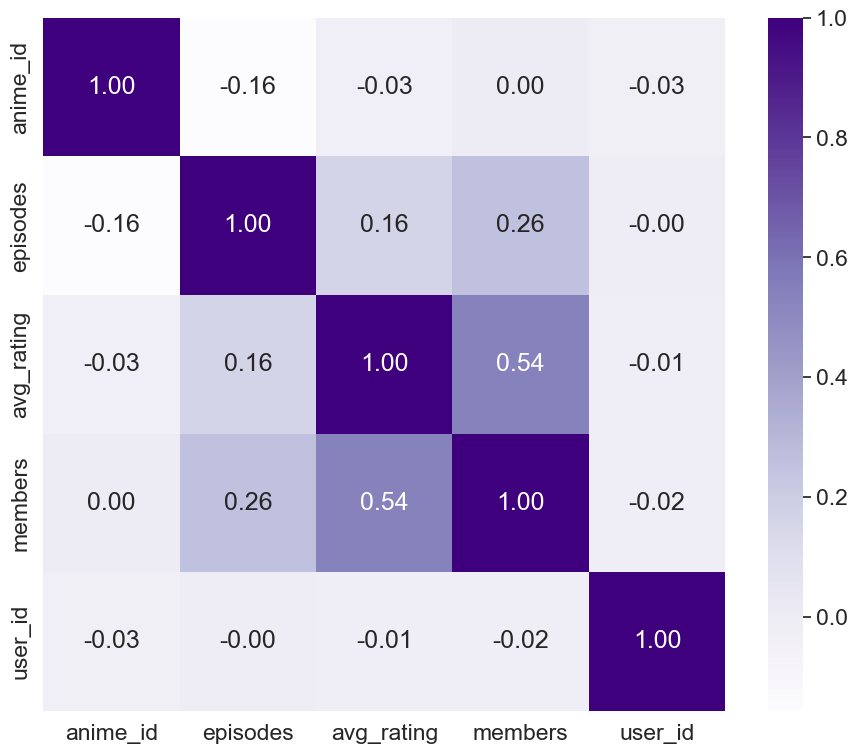

In [351]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

## Recommendation system

### Content-Based

In [352]:
anime_data['name'] = anime_data['name'].str.lower()

In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer

genres_str = anime_data['genre'].str.split(',').astype(str)

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0)
tfidf_matrix = tfidf.fit_transform(genres_str)

tfidf_matrix.shape
# tfidf.get_feature_names()
(12017, 5569)
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(anime_data.index, index=anime_data['name'])


In [354]:

def genre_recommendations(title, highest_rating=False, similarity=False):
    
    title = title.lower()  # Convert input title to lowercase
    
    if highest_rating == False:
        if similarity == False:
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
        
    elif highest_rating == True:
        if similarity == False:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)


In [355]:
Ani_name = input("Enter the name of the anime: ")
genre_recommendations(Ani_name, highest_rating=True, similarity=True)

Enter the name of the anime: bleach


,Anime name,Similarity,Type,Rating
2,katekyo hitman reborn,0.872334,TV,8.37
6,tokyo ravens,0.463695,TV,7.80
0,bleach movie 4 jigokuhen,1.000000,Movie,7.75
1,bleach movie 3 fade to black kimi no na wo yobu,1.000000,Movie,7.66
3,toriko jump super anime tour 2009 special,0.547201,Special,7.13
7,katekyo hitman reborn x ēldlive special,0.458540,Special,7.10
8,codebreaker,0.453394,TV,7.03
4,toriko barbarian ivy wo hokaku seyo,0.547201,Special,6.85
5,naruto takigakure no shitou ore ga eiyuu datt...,0.547201,Special,6.83
9,tokyo esp,0.451333,TV,6.64
